In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.interpolate import interp1d


In [79]:
alpha = 1/137.035

def d2Ndxdlamb(lambd, n, z, beta): #lambda espresso in nm. return light yield per cm per nm
    return 2*np.pi*(z**2)*alpha*(1/lambd**2)*(1-1/((n*beta)**2))*1E9*1E-2

def dNdx(lambd1, lambd2, n, z, beta): #lambda espresso in nm. return light yield per cm in un intervallo di lunghezze d'onda
    return 2*np.pi*(z**2)*alpha*(1/lambd1-1/lambd2)*(1-1/((n*beta)**2))*1E9*1E-2

In [115]:
bgo_s = pd.read_csv('bgo_bso_spectrum.csv')
sipm = pd.read_csv('S14460_pde.csv', names=['lambd', 'pde'], sep='; ', decimal=',')
bgo_t = pd.read_csv('bgo_bso_transmittance.csv', names=['lambd', 'Tr'], sep='; ', decimal=',')

i_bgo_t = interp1d(bgo_t.lambd, bgo_t.Tr, bounds_error=False, fill_value=0)
i_bgo_s = interp1d(bgo_s.lambd, bgo_s.ri, bounds_error=False, fill_value=0)
i_sipm_pde = interp1d(sipm.lambd, sipm.pde/100, bounds_error=False, fill_value=0)

def bgo_s_real(x):
    return i_bgo_s(x)/145.8*bgo_sphotons

def bgo_s_real_x_pde_x_t(x):
    return bgo_s_real(x)*i_sipm_pde(x)*i_bgo_t(x)

def d2Ndxdlamb_x_pde_x_t(x, n, z, beta):
    return d2Ndxdlamb(x, n, z, beta)*i_sipm_pde(x)*i_bgo_t(x)

def bgo_s_real_x_pde(x):
    return bgo_s_real(x)*i_sipm_pde(x)

def d2Ndxdlamb_x_pde(x, n, z, beta):
    return d2Ndxdlamb(x, n, z, beta)*i_sipm_pde(x)

C:\Users\utente\AppData\Local\Temp\ipykernel_8660\2678535463.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  sipm = pd.read_csv('S14460_pde.csv', names=['lambd', 'pde'], sep='; ', decimal=',')
C:\Users\utente\AppData\Local\Temp\ipykernel_8660\2678535463.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  bgo_t = pd.read_csv('bgo_bso_transmittance.csv', names=['lambd', 'Tr'], sep='; ', decimal=',')


In [91]:
dE_mip = 2 #MeV / (g/cm2)

bgo_density = 7.13 #g/cm3
bgo_sLY = 8000 #photons/MeV
bgo_dEdx = dE_mip * bgo_density #MeV/cm 
bgo_sphotons = bgo_dEdx*bgo_sLY #photons/cm
bgo_n = 2.15

z, beta = 1, 0.99

In [92]:
# Cherenkov

In [93]:
z

1

In [94]:
beta

0.99

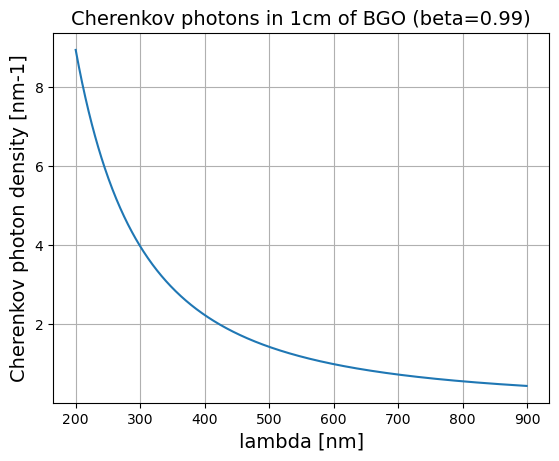

In [95]:
x = np.arange(200, 900, 1)

plt.plot(x, d2Ndxdlamb(x, bgo_n, z, beta))
plt.xlabel('lambda [nm]', size=14)
plt.ylabel('Cherenkov photon density [nm-1]', size=14)
plt.title(f'Cherenkov photons in 1cm of BGO (beta={beta})', size=14)
plt.grid()
plt.show()

In [96]:
# Scintillation

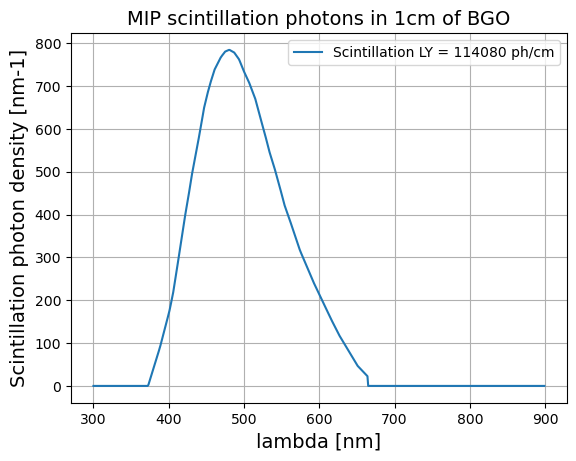

In [97]:
x = np.arange(300, 900, 1)

plt.plot(x, bgo_s_real(x), label=f'Scintillation LY = {bgo_sphotons:.0f} ph/cm')


plt.xlabel('lambda [nm]', size=14)
plt.title(f'MIP scintillation photons in 1cm of BGO', size=14)
plt.ylabel('Scintillation photon density [nm-1]', size=14)
plt.grid()
plt.legend()
plt.show()

In [99]:
# Generated photons

In [100]:
print(f'Scintillation photons - full spectrum: {bgo_sphotons:.2f} photons/cm\n')


Scintillation photons - full spectrum: 114080.00 photons/cm



In [101]:
lambd1, lambd2 = 300, 900
cher_phot = dNdx(lambd1, lambd2, bgo_n, z, beta)
print(f'Cherenkov photons in [{lambd1}-{lambd2}] nm: {cher_phot:.2f} photons/cm\n')

Cherenkov photons in [300-900] nm: 794.01 photons/cm



In [102]:
print(f'Scintillation/Cherenkov photons: {bgo_sphotons/cher_phot:.2f} photons/cm\n')

Scintillation/Cherenkov photons: 143.68 photons/cm



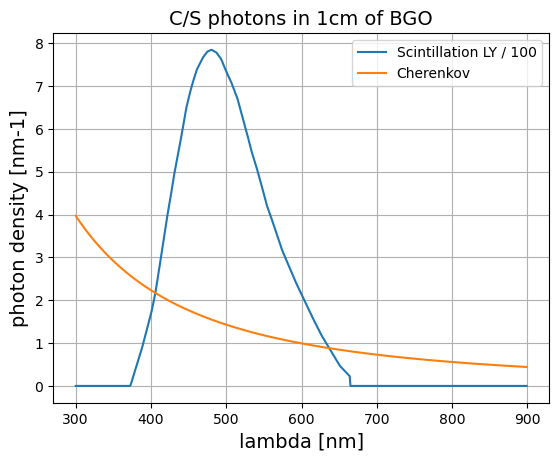

In [103]:
x = np.arange(300, 900, 1)

plt.plot(x, bgo_s_real(x)/100, label='Scintillation LY / 100')
plt.plot(x, d2Ndxdlamb(x, bgo_n, z, beta), label='Cherenkov')
#plt.plot(x, i_bgo_t(x)*8, '--', label='Transmittance in x cm')

#plt.axvspan(300, 650, alpha=0.5, color='gray', label='filtered')

#plt.plot(x, i_bgo_t(x)*4, '--', label='Transmittance x cm')
#plt.plot(x, i_sipm_pde(x)/50*4, '--', label='pde S14460')

plt.xlabel('lambda [nm]', size=14)
plt.ylabel('photon density [nm-1]', size=14)
plt.title('C/S photons in 1cm of BGO', size=14)
plt.grid()
plt.legend()
plt.show()

In [104]:
# optical properties

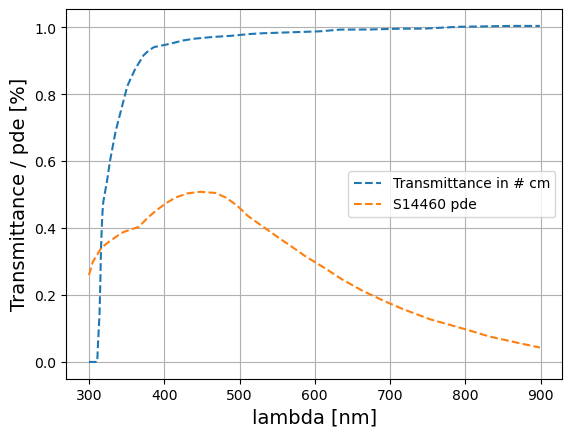

In [105]:
x = np.arange(300, 900, 1)

#plt.plot(x, i_bgo_s(x), label='Scintillation')
#plt.plot(x, d2Ndxdlamb(x, bgo_n, z, beta)/4, label='Cherenkov')

plt.plot(x, i_bgo_t(x), '--', label='Transmittance in # cm')
plt.plot(x, i_sipm_pde(x)/1, '--', label='S14460 pde')

plt.xlabel('lambda [nm]', size=14)
plt.ylabel('Transmittance / pde [%]', size=14)
plt.grid()
plt.legend()
plt.show()

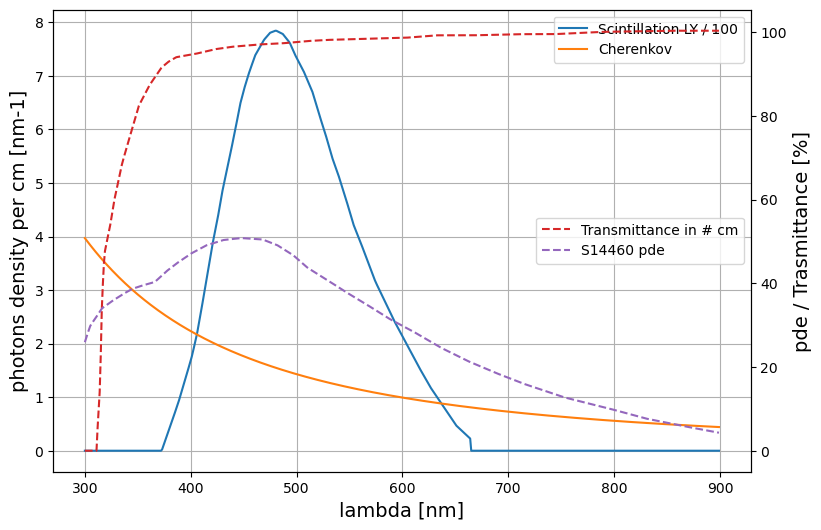

In [106]:
x = np.arange(300, 900, 1)

fig, ax1 = plt.subplots(figsize=(9, 6))
ax2 = ax1.twinx()
ax1.plot(x, bgo_s_real(x)/100, label='Scintillation LY / 100')
ax1.plot(x, d2Ndxdlamb(x, bgo_n, z, beta), label='Cherenkov')

ax2.plot(x, i_bgo_t(x)*100, '--', label='Transmittance in # cm', color='C3')
ax2.plot(x, i_sipm_pde(x)*100, '--', label='S14460 pde', color='C4')


#plt.plot(x, i_bgo_t(x)*8, '--', label='Transmittance in x cm')

#plt.axvspan(300, 650, alpha=0.5, color='gray', label='filtered')

#plt.plot(x, i_bgo_t(x)*4, '--', label='Transmittance x cm')
#plt.plot(x, i_sipm_pde(x)/50*4, '--', label='pde S14460')

ax1.set_xlabel('lambda [nm]', size=14)
ax1.set_ylabel('photons density per cm [nm-1]', size=14)
ax2.set_ylabel('pde / Trasmittance [%]', size=14)
ax1.grid()
ax1.legend()
ax2.legend()
plt.show()

In [107]:
# times efficiency

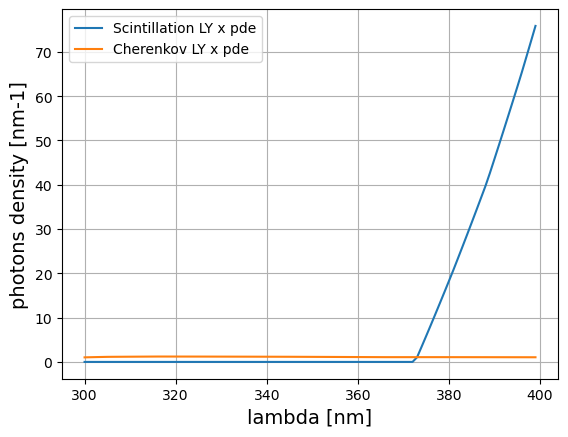

Scintillation LY x pde in [300, 400] nm: 966.53 photons/cm
Scintillation LY x pde in [300, 400] nm: 67.78 photons/MeV

Cherenkov LY x pde in [300, 400] nm : 112.89 photons/cm
Cherenkov LY x pde in [300, 400] nm : 7.92 photons/MeV

S/C LY x pde in [300, 400] nm : 8.56


In [123]:
l1 = 300
l2 = 400

x = np.arange(l1, l2, 1)

#fig, ax1 = plt.subplots(figsize=(9, 6))
plt.plot(x, bgo_s_real_x_pde(x), label='Scintillation LY x pde')
plt.plot(x, d2Ndxdlamb_x_pde(x, bgo_n, z, beta), label='Cherenkov LY x pde')

plt.xlabel('lambda [nm]', size=14)
plt.ylabel('photons density [nm-1]', size=14)
plt.legend()
plt.grid()
plt.show()


npe_scint_ = np.sum(bgo_s_real_x_pde(x))

print(f'Scintillation LY x pde in [{l1}, {l2}] nm: {npe_scint_:.2f} photons/cm')
print(f'Scintillation LY x pde in [{l1}, {l2}] nm: {npe_scint_/bgo_dEdx:.2f} photons/MeV\n')

npe_cher_ = np.sum(d2Ndxdlamb_x_pde(x, bgo_n, z, beta))

print(f'Cherenkov LY x pde in [{l1}, {l2}] nm : {npe_cher_:.2f} photons/cm')
print(f'Cherenkov LY x pde in [{l1}, {l2}] nm : {npe_cher_/bgo_dEdx:.2f} photons/MeV\n')

print(f'S/C LY x pde in [{l1}, {l2}] nm : {npe_scint_/npe_cher_:.2f}')
